<h2 align="center"> Univariate Linear Regression </h2>

### Do cities become richer as populations grows? 

The aim of this project is to study the relationship between population growth and profit in the city of Philadelphia, USA. It is verified if there is or there is not a relationship, how big is this relationship and some predictions for it.

- Population: Independent variable for the estimated population in 10, 000 in the city
- Profit: Total profit generated in 10,000 dollars

### Load the Data and Libraries

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
df = pd.read_csv("bike_sharing_data.txt")
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


### Data description and data visualization

We can perform the data description and visualization for a better understanding of the data:

- Description: From the statistic summary we can see our dataset ranges between 50,000 and 230,000 persons and a profit of -30, 000 (debt) and 240, 000 dollars. The center of the data is around 65, 840 persons and 45, 623 dollars of profit.
- Visualization: From the plot of the two axis data, we can see there is a linear tendency, this could be confirmed from the correlation of these two variables (0.83).

In [4]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


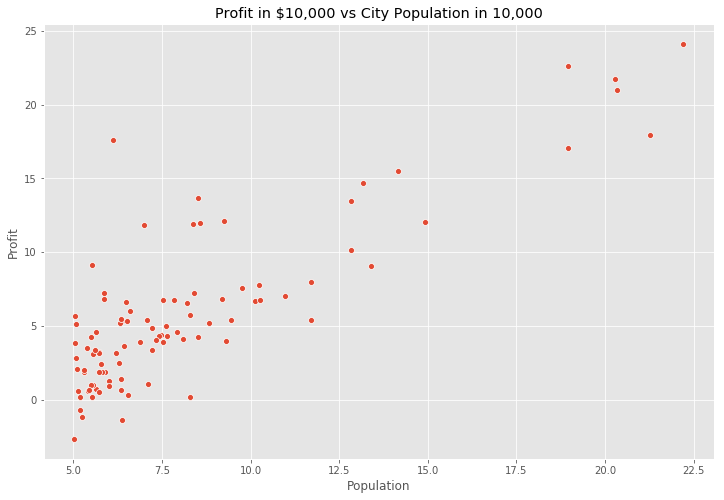

In [5]:
ax = sns.scatterplot(x="Population", y="Profit", data=df)
ax.set_title("Profit in $10,000 vs City Population in 10,000");

In [5]:
df.corr()

,Population,Profit
Population,1.000000,0.837873
Profit,0.837873,1.000000


### Compute the Cost $J(\theta)$

So we can perform a linear regression to fit the data, this will create an approximate model of the data behavior.The objective of linear regression is to minimize the cost function, this is reduce the difference between the created model and the observed data.

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [15]:
def costFunction(x, y, theta):
    m = len(y)
    yPred = x.dot(theta)
    error = (yPred - y) ** 2
    return (1/(2*m)*np.sum(error))

In [17]:
m = df.Population.values.size
x = np.append(np.ones((m,1)), df.Population.values.reshape(m,1),axis=1)
y = df.Profit.values.reshape(m,1)
theta = np.zeros((2,1))

costFunction(x,y,theta)

32.072733877455676

### Gradient Descent

Once we defined a function for calculating the difference between the model and the observations we need to find the model with the least difference. For this we can use the gradient descent.
Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [18]:
def gradientDescent(x, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range (iterations):
        yPred = x.dot(theta)
        error = np.dot(x.transpose(), (yPred - y))
        theta -= alpha * 1/m * error
        costs.append(costFunction(x,y,theta))
    return (theta, costs)

In [22]:
theta, costs = gradientDescent(x,y,theta, alpha=0.01, iterations=2000)
print ("h(x) = {} + {}x".format(str(round(theta[0,0], 2)), str(round(theta[1,0], 2))))

h(x) = -3.9 + 1.19x


This can be interpreted as follows:

$ Profit (10,000 Dollars) = -3.9 + 1.19*(10,000  persons)$

For every new 10,000 new people in the city the population will grow in profit 11,900 dollars. Also, for a city with no population the profit will be -39, 000 dollars, probably due to city expenses.

### Visualising the Cost Function $J(\theta)$

The most suitable fit is the one who has the lowest difference to the model (Cost Function), this can be seen from the next plot. Only for understanding purposes

In [23]:
from mpl_toolkits.mplot3d import Axes3D

In [25]:
theta0 = np.linspace(-10,10,100)
theta1 = np.linspace(-1,4,100)

costValues = np.zeros((len(theta0), len(theta1)))
for i in range(len(theta0)):
    for j in range (len(theta1)):
        t=np.array([theta0[i], theta1[j]])
        costValues[i,j]=costFunction(x,y,t)

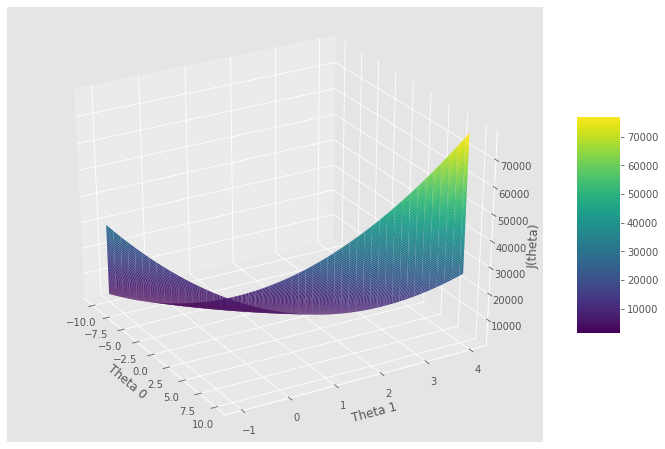

In [29]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection="3d")
surface = ax.plot_surface(theta0, theta1, costValues, cmap="viridis")
fig.colorbar(surface, shrink=0.5, aspect=5)
plt.xlabel("Theta 0")
plt.ylabel("Theta 1")
ax.set_zlabel("J(theta)")
ax.view_init(30,330)

plt.show()

### Task 7: Plotting the Convergence

For every iteration of the gradient descent is an equivalent to taking steps to the minimum cost value (minimum difference) until that point is reached, then the convergence curve will not present significant variability.

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Values of the cost function over iterations of gradient descent')

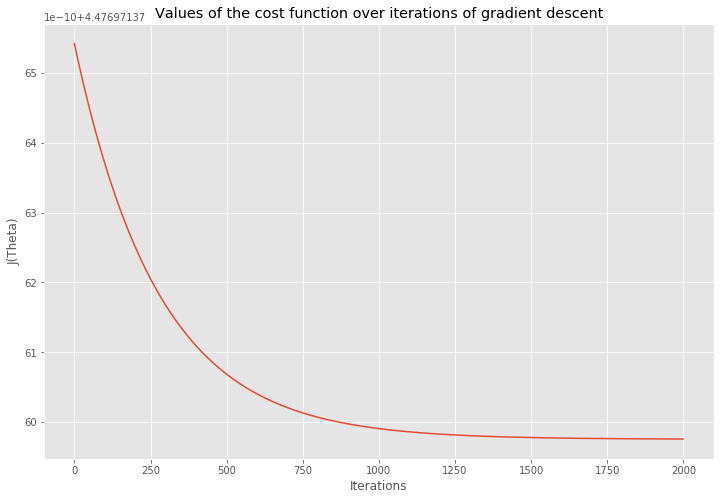

In [30]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("J(Theta)")
plt.title("Values of the cost function over iterations of gradient descent")

### Data prediction

Now we can make an estimated prediction for the profit given a number of population in the city, this can be done with the following formula

$h_\theta(x) = \theta^Tx$

In [31]:
theta.shape

(2, 1)

In [32]:
theta

array([[-3.89577874],
       [ 1.19303343]])

In [33]:
theta = np.squeeze(theta)

In [36]:
def predict(x, theta):
    yPred = np.dot(theta.transpose(), x)
    return yPred

In [37]:
y1 = predict(np.array([1,4]), theta) * 10000
print ("for a population of 40,000 people the model predicts a profit of $"+str(round(y1,0)))

for a population of 40,000 people the model predicts a profit of $8764.0


### Visualization

Finally, we can visualize the estimated model 

Text(0.5, 1.0, 'Linear regression fit')

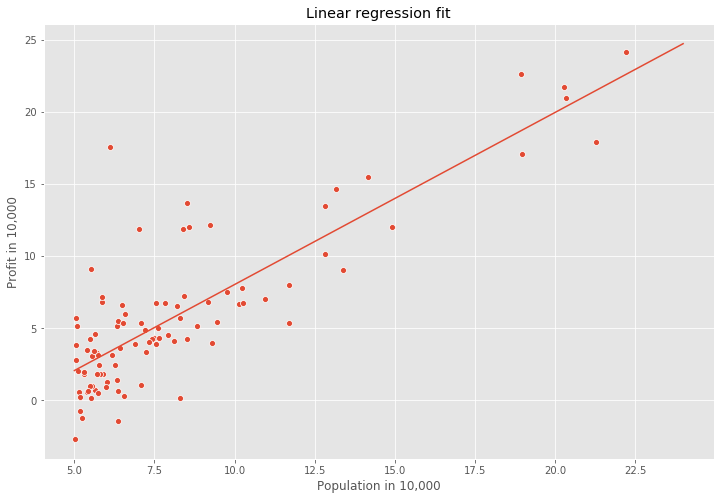

In [35]:
ax = sns.scatterplot(x="Population", y="Profit", data=df)
ax.set_title("Profit in $10,000 vs City Population in 10,000");

#range in x in scatterplot
xValues=[x for x in range(5,25)]
yValues=[(x*theta[1]+theta[0]) for x in xValues]
sns.lineplot(xValues, yValues)

plt.xlabel("Population in 10,000")
plt.ylabel("Profit in 10,000")
plt.title("Linear regression fit")